In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Mann/Healthcare data.csv')
data

,DRG Definition,Provider Id,Provider Name,Provider Street Address,Provider City,Provider State,Provider Zip Code,Hospital Referral Region Description,Total Discharges,Average Covered Charges,Average Total Payments,Average Medicare Payments,Summary Level,State,State FIPS,Insured Males 18-25,Noninsured Males 18-25,Females 18-25 with Insurance,Females 18-25 without insurance
0,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,AL - Dothan,91,"32,963.07","5,777.24","4,763.73",40,AL,1,"173,849","58,849","188,498","48,144"
1,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,20017,ALASKA REGIONAL HOSPITAL,2801 DEBARR ROAD,ANCHORAGE,AK,99508,AK - Anchorage,23,"34,805.13","8,401.95","6,413.78",40,AK,2,"26,917","12,275","25,692","8,152"
2,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,30002,BANNER GOOD SAMARITAN MEDICAL CENTER,1111 EAST MCDOWELL ROAD,PHOENIX,AZ,85006,AZ - Phoenix,11,"34,803.81","7,768.90","6,951.45",40,AZ,4,"233,098","92,136","245,929","72,752"
3,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,40004,WASHINGTON REGIONAL MED CTR AT NORTH HILLS,3215 N NORTH HILLS BLVD,FAYETTEVILLE,AR,72703,AR - Springdale,39,"30,470.56","5,811.56","4,372.61",40,AR,5,"101,489","40,199","105,642","34,898"
4,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,50006,ST JOSEPH HOSPITAL,2700 DOLBEER ST,EUREKA,CA,95501,CA - Redding,48,"44,664.45","8,227.14","6,936.52",40,CA,6,"1,458,114","515,578","1,511,793","403,457"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163060,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,50036,BAKERSFIELD MEMORIAL HOSPITAL,420 34TH ST BOX 1888,BAKERSFIELD,CA,93301,CA - Bakersfield,21,"53,334.80","8,012.23","6,213.19",40,CA,6,"1,458,114","515,578","1,511,793","403,457"
163061,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,50026,GROSSMONT HOSPITAL,5555 GROSSMONT CENTER DRIVE BOX 58,LA MESA,CA,91942,CA - San Diego,26,"40,062.46","7,449.80","6,358.07",40,CA,6,"1,458,114","515,578","1,511,793","403,457"
163062,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,50017,MERCY GENERAL HOSPITAL,4001 J ST,SACRAMENTO,CA,95819,CA - Sacramento,27,"66,207.66","10,863.22","6,924.70",40,CA,6,"1,458,114","515,578","1,511,793","403,457"
163063,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,50013,ST HELENA HOSPITAL,10 WOODLAND ROAD,SAINT HELENA,CA,94574,CA - Napa,17,"105,929.47","9,438.00","8,376.35",40,CA,6,"1,458,114","515,578","1,511,793","403,457"


In [ ]:
data.isnull().sum()

DRG Definition                          0
Provider Id                             0
Provider Name                           0
Provider Street Address                 0
Provider City                           0
Provider State                          0
Provider Zip Code                       0
Hospital Referral Region Description    0
Total Discharges                        0
Average Covered Charges                 0
Average Total Payments                  0
Average Medicare Payments               0
Summary Level                           0
State                                   0
State FIPS                              0
Insured Males 18-25                     0
Noninsured Males 18-25                  0
Females 18-25 with Insurance            0
Females 18-25 without insurance         0
dtype: int64

In [ ]:
data.dtypes

DRG Definition                          object
Provider Id                              int64
Provider Name                           object
Provider Street Address                 object
Provider City                           object
Provider State                          object
Provider Zip Code                        int64
Hospital Referral Region Description    object
Total Discharges                        object
Average Covered Charges                 object
Average Total Payments                  object
Average Medicare Payments               object
Summary Level                            int64
State                                   object
State FIPS                               int64
Insured Males 18-25                     object
Noninsured Males 18-25                  object
Females 18-25 with Insurance            object
Females 18-25 without insurance         object
dtype: object

In [ ]:
data = data.drop('Summary Level', axis =1)
data = data.drop('Provider Zip Code', axis =1)
data = data.drop('Provider Id', axis =1)

In [ ]:
data.head()

,DRG Definition,Provider Name,Provider Street Address,Provider City,Provider State,Hospital Referral Region Description,Total Discharges,Average Covered Charges,Average Total Payments,Average Medicare Payments,State,State FIPS,Insured Males 18-25,Noninsured Males 18-25,Females 18-25 with Insurance,Females 18-25 without insurance
0,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,AL - Dothan,91,"32,963.07","5,777.24","4,763.73",AL,1,"173,849","58,849","188,498","48,144"
1,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,ALASKA REGIONAL HOSPITAL,2801 DEBARR ROAD,ANCHORAGE,AK,AK - Anchorage,23,"34,805.13","8,401.95","6,413.78",AK,2,"26,917","12,275","25,692","8,152"
2,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,BANNER GOOD SAMARITAN MEDICAL CENTER,1111 EAST MCDOWELL ROAD,PHOENIX,AZ,AZ - Phoenix,11,"34,803.81","7,768.90","6,951.45",AZ,4,"233,098","92,136","245,929","72,752"
3,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,WASHINGTON REGIONAL MED CTR AT NORTH HILLS,3215 N NORTH HILLS BLVD,FAYETTEVILLE,AR,AR - Springdale,39,"30,470.56","5,811.56","4,372.61",AR,5,"101,489","40,199","105,642","34,898"
4,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,ST JOSEPH HOSPITAL,2700 DOLBEER ST,EUREKA,CA,CA - Redding,48,"44,664.45","8,227.14","6,936.52",CA,6,"1,458,114","515,578","1,511,793","403,457"


In [ ]:
numeric_features = data[["Total Discharges", "Average Covered Charges","Average Total Payments", "Average Medicare Payments", "Insured Males 18-25",
                         "Noninsured Males 18-25", "Females 18-25 with Insurance", "Females 18-25 without insurance"]]
numeric_features.head()

,Total Discharges,Average Covered Charges,Average Total Payments,Average Medicare Payments,Insured Males 18-25,Noninsured Males 18-25,Females 18-25 with Insurance,Females 18-25 without insurance
0,91,"32,963.07","5,777.24","4,763.73","173,849","58,849","188,498","48,144"
1,23,"34,805.13","8,401.95","6,413.78","26,917","12,275","25,692","8,152"
2,11,"34,803.81","7,768.90","6,951.45","233,098","92,136","245,929","72,752"
3,39,"30,470.56","5,811.56","4,372.61","101,489","40,199","105,642","34,898"
4,48,"44,664.45","8,227.14","6,936.52","1,458,114","515,578","1,511,793","403,457"


In [ ]:
data.dtypes

DRG Definition                          object
Provider Name                           object
Provider Street Address                 object
Provider City                           object
Provider State                          object
Hospital Referral Region Description    object
Total Discharges                        object
Average Covered Charges                 object
Average Total Payments                  object
Average Medicare Payments               object
State                                   object
State FIPS                               int64
Insured Males 18-25                     object
Noninsured Males 18-25                  object
Females 18-25 with Insurance            object
Females 18-25 without insurance         object
dtype: object

In [ ]:
data["Insured Males 18-25"] = data["Insured Males 18-25"].str.replace(',', '')
data["Average Covered Charges"] = data["Average Covered Charges"].str.replace(',','')
data["Average Total Payments"] = data["Average Total Payments"].str.replace(',','')
data["Noninsured Males 18-25"] = data["Noninsured Males 18-25"].str.replace(',','')
data["Females 18-25 with Insurance"] = data["Females 18-25 with Insurance"].str.replace(',','')
data["Females 18-25 without insurance"] = data["Females 18-25 without insurance"].str.replace(',','')
data["Average Medicare Payments"] = data["Average Medicare Payments"].str.replace(',','')

In [ ]:
data["Insured Males 18-25"] = data["Insured Males 18-25"].astype(object).astype(float)
data["Average Covered Charges"] = data["Average Covered Charges"].astype(object).astype(float)
data["Average Total Payments"] = data["Average Total Payments"].astype(object).astype(float)
data["Noninsured Males 18-25"] = data["Noninsured Males 18-25"].astype(object).astype(float)
data["Females 18-25 with Insurance"] = data["Females 18-25 with Insurance"].astype(object).astype(float)
data["Females 18-25 without insurance"] = data["Females 18-25 without insurance"].astype(object).astype(float)
data["Average Medicare Payments"] = data["Average Medicare Payments"].astype(object).astype(float)

In [ ]:
data.dtypes

DRG Definition                           object
Provider Name                            object
Provider Street Address                  object
Provider City                            object
Provider State                           object
Hospital Referral Region Description     object
Total Discharges                         object
Average Covered Charges                 float64
Average Total Payments                  float64
Average Medicare Payments               float64
State                                    object
State FIPS                                int64
Insured Males 18-25                     float64
Noninsured Males 18-25                  float64
Females 18-25 with Insurance            float64
Females 18-25 without insurance         float64
dtype: object

In [ ]:
data.describe()

,Average Covered Charges,Average Total Payments,Average Medicare Payments,State FIPS,Insured Males 18-25,Noninsured Males 18-25,Females 18-25 with Insurance,Females 18-25 without insurance
count,163065.000000,163065.000000,163065.000000,163065.000000,1.630650e+05,163065.000000,1.630650e+05,163065.000000
mean,36133.954224,9707.473804,8494.490964,28.012075,4.584118e+05,157608.468844,4.820515e+05,125722.334180
std,35065.365931,7664.642598,7309.467261,15.511332,3.726611e+05,159069.327969,3.869725e+05,131810.459609
min,2459.400000,2673.000000,1148.900000,1.000000,2.268100e+04,3406.000000,2.149700e+04,2042.000000
25%,15947.160000,5234.500000,4192.350000,13.000000,2.172540e+05,58477.000000,2.227930e+05,48006.000000
50%,25245.820000,7214.100000,6158.460000,28.000000,3.322220e+05,94184.000000,3.650870e+05,69359.000000
75%,43232.590000,11286.400000,10056.880000,41.000000,5.804890e+05,159157.000000,6.248790e+05,127014.000000
max,929118.900000,156158.180000,154620.810000,56.000000,1.458114e+06,515578.000000,1.511793e+06,418602.000000


In [ ]:
data['Total Discharges'].describe()

count     163065
unique       642
top           11
freq        7815
Name: Total Discharges, dtype: object

In [ ]:
df = pd.DataFrame(data, columns=['Hospital Referral Region Description','Total Discharges'])
print(df)

       Hospital Referral Region Description Total Discharges
0                               AL - Dothan               91
1                            AK - Anchorage               23
2                              AZ - Phoenix               11
3                           AR - Springdale               39
4                              CA - Redding               48
...                                     ...              ...
163060                     CA - Bakersfield               21
163061                       CA - San Diego               26
163062                      CA - Sacramento               27
163063                            CA - Napa               17
163064                CA - San Mateo County               16

[163065 rows x 2 columns]


In [ ]:
data['Average Covered Charges'].describe()

count    163065.000000
mean      36133.954224
std       35065.365931
min        2459.400000
25%       15947.160000
50%       25245.820000
75%       43232.590000
max      929118.900000
Name: Average Covered Charges, dtype: float64

<function matplotlib.pyplot.show(*args, **kw)>

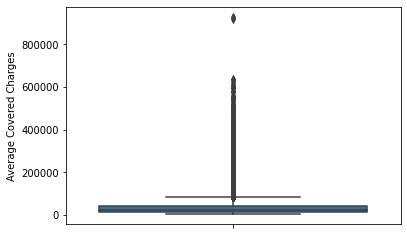

In [ ]:
sns.boxplot(y='Average Covered Charges', data=data)
plt.show

**There are 2 outlying values in Average Covered Charges**

In [ ]:
df2 = pd.DataFrame(data, columns=['Provider State','Average Covered Charges'])
print(df2)

       Provider State  Average Covered Charges
0                  AL                 32963.07
1                  AK                 34805.13
2                  AZ                 34803.81
3                  AR                 30470.56
4                  CA                 44664.45
...               ...                      ...
163060             CA                 53334.80
163061             CA                 40062.46
163062             CA                 66207.66
163063             CA                105929.47
163064             CA                 51950.87

[163065 rows x 2 columns]


In [ ]:
df2.dtypes

Provider State              object
Average Covered Charges    float64
dtype: object

In [ ]:
df2.groupby(['Average Covered Charges']).sum()

,Provider State
Average Covered Charges,
2459.40,TX
2521.37,LA
2536.69,AL
2701.72,LA
2749.94,TX
...,...
613926.60,PA
628730.40,CA
637377.71,CA


<function matplotlib.pyplot.show(*args, **kw)>

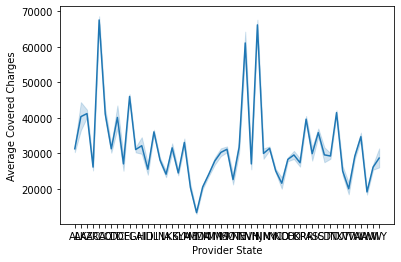

In [ ]:
sns.lineplot(x='Provider State', y='Average Covered Charges', data=df2)
plt.show

**The outliers are from CA, NV and NJ states which have the maximum covered charges while MD being the lowest**


In [ ]:
df3 = pd.DataFrame(data, columns=['Provider State','Insured Males 18-25'])
df3.groupby(['Insured Males 18-25']).mean()

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: FutureWarning: Dropping invalid columns in DataFrameGroupBy.mean is deprecated. In a future version, a TypeError will be raised. Before calling .mean, select only columns which should be valid for the function.
  exec(code_obj, self.user_global_ns, self.user_ns)


""
Insured Males 18-25
22681.0
26917.0
30716.0
31771.0
32991.0
36441.0
37479.0
39054.0
46375.0


<function matplotlib.pyplot.show(*args, **kw)>

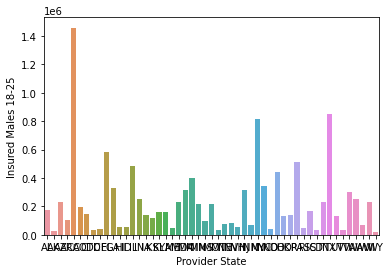

In [ ]:
sns.barplot(x='Provider State', y='Insured Males 18-25', data=df3)
plt.show

In [ ]:
df5 = pd.DataFrame(data, columns=['Provider State','Noninsured Males 18-25'])
df5.groupby(['Noninsured Males 18-25']).mean()

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: FutureWarning: Dropping invalid columns in DataFrameGroupBy.mean is deprecated. In a future version, a TypeError will be raised. Before calling .mean, select only columns which should be valid for the function.
  exec(code_obj, self.user_global_ns, self.user_ns)


""
Noninsured Males 18-25
3406.0
3712.0
6340.0
6446.0
6610.0
7891.0
9001.0
9536.0
10318.0


<function matplotlib.pyplot.show(*args, **kw)>

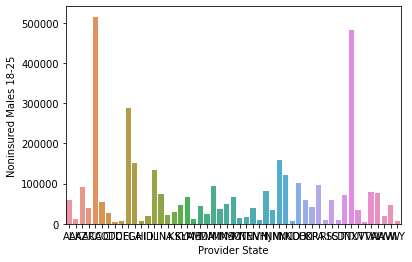

In [ ]:
sns.barplot(x='Provider State', y='Noninsured Males 18-25', data=df5)
plt.show

In [ ]:
df4 = pd.DataFrame(data, columns=['Provider State','Average Medicare Payments'])
df4.groupby(['Average Medicare Payments']).mean()

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: FutureWarning: Dropping invalid columns in DataFrameGroupBy.mean is deprecated. In a future version, a TypeError will be raised. Before calling .mean, select only columns which should be valid for the function.
  exec(code_obj, self.user_global_ns, self.user_ns)


""
Average Medicare Payments
1148.90
1327.23
1400.57
1594.50
1603.83
...
109303.21
113462.09
130466.57


<function matplotlib.pyplot.show(*args, **kw)>

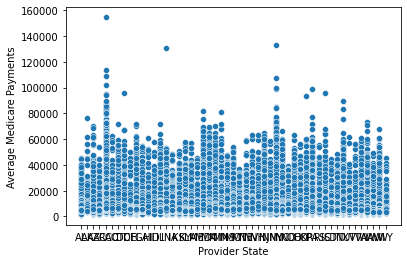

In [ ]:
sns.scatterplot(x='Provider State', y='Average Medicare Payments', data=df4)
plt.show

In [ ]:
df6 = pd.DataFrame(data, columns=['Provider State','Females 18-25 with Insurance'])
df6.groupby(['Females 18-25 with Insurance']).mean()

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: FutureWarning: Dropping invalid columns in DataFrameGroupBy.mean is deprecated. In a future version, a TypeError will be raised. Before calling .mean, select only columns which should be valid for the function.
  exec(code_obj, self.user_global_ns, self.user_ns)


""
Females 18-25 with Insurance
21497.0
25692.0
29822.0
32975.0
36083.0
36595.0
40390.0
42265.0
48145.0


<function matplotlib.pyplot.show(*args, **kw)>

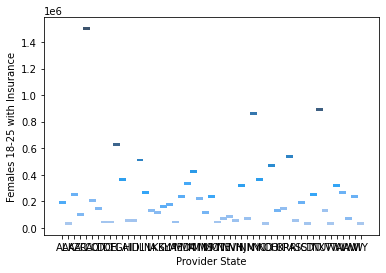

In [ ]:
sns.histplot(x='Provider State', y='Females 18-25 with Insurance', data=df6)
plt.show

In [ ]:
df7 = pd.DataFrame(data, columns=['Provider State','Females 18-25 without insurance'])
df7.groupby(['Females 18-25 without insurance']).mean()

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: FutureWarning: Dropping invalid columns in DataFrameGroupBy.mean is deprecated. In a future version, a TypeError will be raised. Before calling .mean, select only columns which should be valid for the function.
  exec(code_obj, self.user_global_ns, self.user_ns)


""
Females 18-25 without insurance
2042.0
2458.0
4704.0
5044.0
5303.0
5430.0
7176.0
7532.0
7877.0


<function matplotlib.pyplot.show(*args, **kw)>

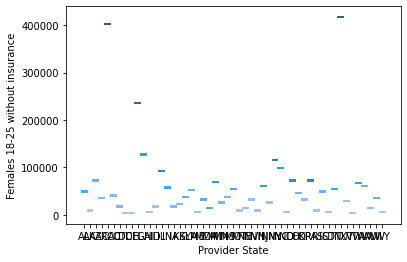

In [ ]:
sns.histplot(x='Provider State', y='Females 18-25 without insurance', data=df7)
plt.show

In [ ]:
df8 = pd.DataFrame(data, columns=['DRG Definition','Total Discharges'])
df8.groupby(['Total Discharges']).sum()

,DRG Definition
Total Discharges,
"1,022",470 - MAJOR JOINT REPLACEMENT OR REATTACHMENT ...
"1,028",885 - PSYCHOSES
"1,031",470 - MAJOR JOINT REPLACEMENT OR REATTACHMENT ...
"1,032",470 - MAJOR JOINT REPLACEMENT OR REATTACHMENT ...
"1,050",885 - PSYCHOSES
...,...
98,310 - CARDIAC ARRHYTHMIA & CONDUCTION DISORDER...
981,247 - PERC CARDIOVASC PROC W DRUG-ELUTING STEN...
984,312 - SYNCOPE & COLLAPSE


In [ ]:
df8['Total Discharges'] = df8["Total Discharges"].str.replace(',', '')
df8['Total Discharges'] = df8["Total Discharges"].astype(float)

<function matplotlib.pyplot.show(*args, **kw)>

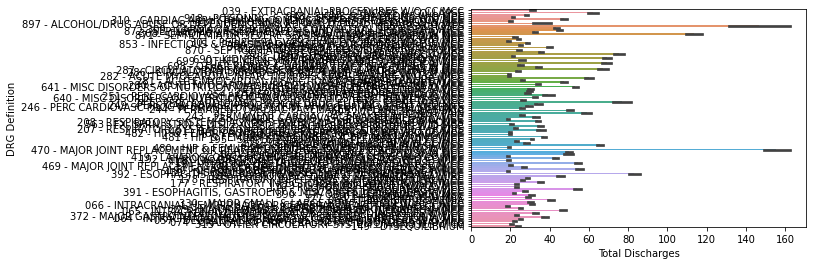

In [ ]:
sns.barplot(x = 'Total Discharges', y = 'DRG Definition', data = df8)
plt.show

In [ ]:
df9 = pd.DataFrame(data, columns=['State','Average Total Payments', 'Average Medicare Payments'])
df9['Payments paid by Patients'] = df9['Average Total Payments'] -  df9['Average Medicare Payments']

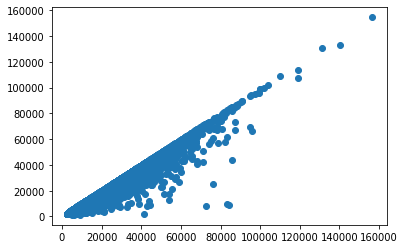

In [ ]:
df10 = pd.DataFrame(data, columns=['Average Total Payments', 'Average Medicare Payments'])
plt.scatter(df10['Average Total Payments'], df10['Average Medicare Payments'])

In [ ]:
modeldata = pd.DataFrame(data, columns=['State', 'Insured Males 18-25', 'Noninsured Males 18-25', 'Females 18-25 with Insurance', 'Females 18-25 without insurance', 'Average Covered Charges', 'Average Total Payments', 'Average Medicare Payments', 'Total Discharges'])

In [ ]:
modeldata

,State,Insured Males 18-25,Noninsured Males 18-25,Females 18-25 with Insurance,Females 18-25 without insurance,Average Covered Charges,Average Total Payments,Average Medicare Payments,Total Discharges
0,AL,173849.0,58849.0,188498.0,48144.0,32963.07,5777.24,4763.73,91
1,AK,26917.0,12275.0,25692.0,8152.0,34805.13,8401.95,6413.78,23
2,AZ,233098.0,92136.0,245929.0,72752.0,34803.81,7768.90,6951.45,11
3,AR,101489.0,40199.0,105642.0,34898.0,30470.56,5811.56,4372.61,39
4,CA,1458114.0,515578.0,1511793.0,403457.0,44664.45,8227.14,6936.52,48
...,...,...,...,...,...,...,...,...,...
163060,CA,1458114.0,515578.0,1511793.0,403457.0,53334.80,8012.23,6213.19,21
163061,CA,1458114.0,515578.0,1511793.0,403457.0,40062.46,7449.80,6358.07,26
163062,CA,1458114.0,515578.0,1511793.0,403457.0,66207.66,10863.22,6924.70,27
163063,CA,1458114.0,515578.0,1511793.0,403457.0,105929.47,9438.00,8376.35,17


In [ ]:
modeldata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 163065 entries, 0 to 163064
Data columns (total 9 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   State                            163065 non-null  object 
 1   Insured Males 18-25              163065 non-null  float64
 2   Noninsured Males 18-25           163065 non-null  float64
 3   Females 18-25 with Insurance     163065 non-null  float64
 4   Females 18-25 without insurance  163065 non-null  float64
 5   Average Covered Charges          163065 non-null  float64
 6   Average Total Payments           163065 non-null  float64
 7   Average Medicare Payments        163065 non-null  float64
 8   Total Discharges                 163065 non-null  object 
dtypes: float64(7), object(2)
memory usage: 11.2+ MB


In [ ]:
#modeldata["Insured Males 18-25"] = modeldata["Insured Males 18-25"].str.replace(',', '')
'''modeldata["Average Covered Charges"] = modeldata["Average Covered Charges"].str.replace(',','')
modeldata["Average Total Payments"] = modeldata["Average Total Payments"].str.replace(',','')
modeldata["Noninsured Males 18-25"] = modeldata["Noninsured Males 18-25"].str.replace(',','')
modeldata["Females 18-25 with Insurance"] = modeldata["Females 18-25 with Insurance"].str.replace(',','')
modeldata["Females 18-25 without insurance"] = modeldata["Females 18-25 without insurance"].str.replace(',','')
modeldata["Average Medicare Payments"] = modeldata["Average Medicare Payments"].str.replace(',','')'''
modeldata["Total Discharges"] = modeldata["Total Discharges"].str.replace(',','')
modeldata["Insured Males 18-25"] = modeldata["Insured Males 18-25"].astype(object).astype(float)
modeldata["Average Covered Charges"] = modeldata["Average Covered Charges"].astype(object).astype(float)
modeldata["Average Total Payments"] = modeldata["Average Total Payments"].astype(object).astype(float)
modeldata["Noninsured Males 18-25"] = modeldata["Noninsured Males 18-25"].astype(object).astype(float)
modeldata["Females 18-25 with Insurance"] = modeldata["Females 18-25 with Insurance"].astype(object).astype(float)
modeldata["Females 18-25 without insurance"] = modeldata["Females 18-25 without insurance"].astype(object).astype(float)
modeldata["Average Medicare Payments"] = modeldata["Average Medicare Payments"].astype(object).astype(float)

In [ ]:
modeldata["Total Discharges"] = modeldata["Total Discharges"].astype(object).astype(float)

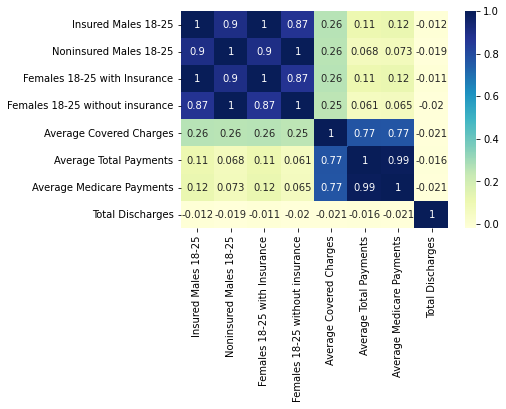

In [ ]:
sns.heatmap(modeldata.corr(), cmap="YlGnBu", annot=True);

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from statistics import mean

In [ ]:
modeldata

,State,Insured Males 18-25,Noninsured Males 18-25,Females 18-25 with Insurance,Females 18-25 without insurance,Average Covered Charges,Average Total Payments,Average Medicare Payments,Total Discharges
0,AL,173849.0,58849.0,188498.0,48144.0,32963.07,5777.24,4763.73,91.0
1,AK,26917.0,12275.0,25692.0,8152.0,34805.13,8401.95,6413.78,23.0
2,AZ,233098.0,92136.0,245929.0,72752.0,34803.81,7768.90,6951.45,11.0
3,AR,101489.0,40199.0,105642.0,34898.0,30470.56,5811.56,4372.61,39.0
4,CA,1458114.0,515578.0,1511793.0,403457.0,44664.45,8227.14,6936.52,48.0
...,...,...,...,...,...,...,...,...,...
163060,CA,1458114.0,515578.0,1511793.0,403457.0,53334.80,8012.23,6213.19,21.0
163061,CA,1458114.0,515578.0,1511793.0,403457.0,40062.46,7449.80,6358.07,26.0
163062,CA,1458114.0,515578.0,1511793.0,403457.0,66207.66,10863.22,6924.70,27.0
163063,CA,1458114.0,515578.0,1511793.0,403457.0,105929.47,9438.00,8376.35,17.0


In [ ]:
X = modeldata.iloc[:, [1,3,6]]
y = modeldata.iloc[:, [7]]

In [ ]:
X.head()

,Insured Males 18-25,Females 18-25 with Insurance,Average Total Payments
0,173849.0,188498.0,5777.24
1,26917.0,25692.0,8401.95
2,233098.0,245929.0,7768.90
3,101489.0,105642.0,5811.56
4,1458114.0,1511793.0,8227.14


In [ ]:
y.head()

,Average Medicare Payments
0,4763.73
1,6413.78
2,6951.45
3,4372.61
4,6936.52


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)

In [ ]:
X_train.shape

(114145, 3)

In [ ]:
X_test.shape

(48920, 3)

In [ ]:
scaler = StandardScaler()

In [ ]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)
y_test_scaled = scaler.fit_transform(y_test)

In [ ]:
lr = LinearRegression()

In [ ]:
model = lr.fit(X_train_scaled, y_train)
predictions = lr.predict(X_test_scaled)

In [ ]:
predictions.shape

(48920, 1)

In [ ]:
print('Intercept:', model.intercept_)
print('Coefficients:', model.coef_)

Intercept: [8487.48847378]
Coefficients: [[ 1255.17124684 -1185.53041001  7247.25951901]]


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import r2_score

In [ ]:
r2_score(y_test, predictions)

0.9780597218590256

In [ ]:
from sklearn.model_selection import KFold, cross_val_score
kf = KFold(shuffle = True, random_state=80)
cross_scores = cross_val_score(lr, X_test_scaled, y_test, cv=kf)
kf_test = np.sqrt(np.mean(np.abs(cross_scores)))
#print(kf_test)

In [ ]:
from sklearn.linear_model import Ridge
ridge = Ridge(alpha = 1)
ridge.fit(X_train_scaled, y_train)
ridge.score(X_test_scaled, y_test)
cross_scores2 = cross_val_score(ridge, X_test_scaled, y_test, cv = kf)

In [ ]:
reg_test = np.sqrt(np.mean(np.abs(cross_scores2)))
print(reg_test)

0.9889637591273455
